In [1]:

import pandas as pd

import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv('clean_data/data_from_R.csv')

/home/jose/envs/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (151,193,194,195) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data

,resp,qsamptyp,qlan,state,cregion,WEIGHT,WGT_ATL_MSA,WGT_BAL_MSA,WGT_BOS_MSA,WGT_CHI_MSA,...,partyln,ideo,hh1rec,hh3rec,qpl1,qpl1a,qpc1,fertrec,SEX,qp99
0,1000001,LL,English,Massachusetts,Northeast,0.438028,NaN,NaN,0.513228,NaN,...,(VOL) Other/Don't know/Refused,Conservative,Three,Three,"Yes, have cell phone",NaN,NaN,Four,Female,Yes
1,1000003,LL,English,Maryland,South,0.718144,NaN,NaN,NaN,NaN,...,Democrat,Moderate,Three,Two,"Yes, have cell phone",NaN,NaN,One,Male,Yes
2,1000005,LL,English,Ohio,Midwest,0.384246,NaN,NaN,NaN,NaN,...,NaN,Very conservative,Two,Two,"Yes, have cell phone",NaN,NaN,Three,Female,Yes
3,1000006,LL,English,Michigan,Midwest,0.663059,NaN,NaN,NaN,NaN,...,(VOL) Other/Don't know/Refused,Very conservative,Three,Three,"Yes, have cell phone",NaN,NaN,Two,Female,Yes
4,1000008,LL,English,Florida,South,1.644445,NaN,NaN,NaN,NaN,...,(VOL) Other/Don't know/Refused,Very liberal?,Five or more,Two,"No, do not","Yes, someone in household has cell phone",NaN,Three,Female,Yes
5,1000010,LL,English,Virginia,South,0.356975,NaN,NaN,NaN,NaN,...,Republican,Conservative,One,NaN,"No, do not",NaN,NaN,Two,Female,Yes
6,1000012,LL,English,New York,Northeast,0.663518,NaN,NaN,NaN,NaN,...,NaN,Moderate,Four,Four,"Yes, have cell phone",NaN,NaN,Two,Female,Yes
7,1000013,LL,English,New York,Northeast,0.743416,NaN,NaN,NaN,NaN,...,NaN,"Liberal, OR",Five or more,Three,"Yes, have cell phone",NaN,NaN,Three,Male,No
8,1000014,LL,English,New York,Northeast,0.369946,NaN,NaN,NaN,NaN,...,Republican,Conservative,One,NaN,"Yes, have cell phone",NaN,NaN,None,Male,Yes
9,1000015,LL,English,Oregon,West,1.416114,NaN,NaN,NaN,NaN,...,Democrat,Moderate,One,NaN,"No, do not",NaN,NaN,Two,Female,Yes


# Codes: 
- qe1: (Mormon=3,9=Atheist, 99X=dk)
- racethn (White non hispanic=1, black=2,hispanic=3,other=4,idk=9)
- income (1 less than 10k, 2 less than 20k, 99 refused/idk)

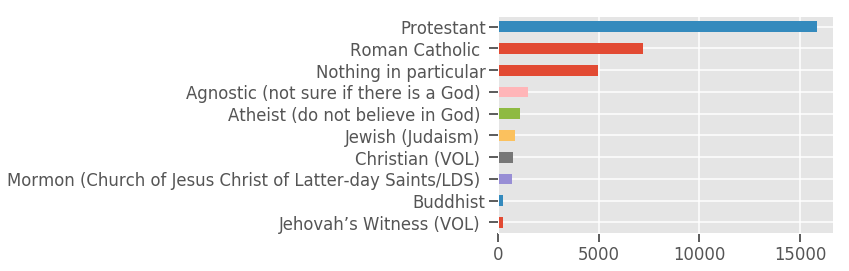

In [5]:
data.qe1.value_counts(ascending=True).tail(10).plot.barh()
#Don't knows are not a big group

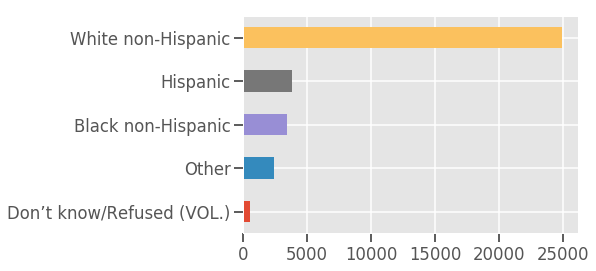

In [6]:
data.racethn.value_counts(ascending=True).plot.barh()
#Don't knows are not a big group

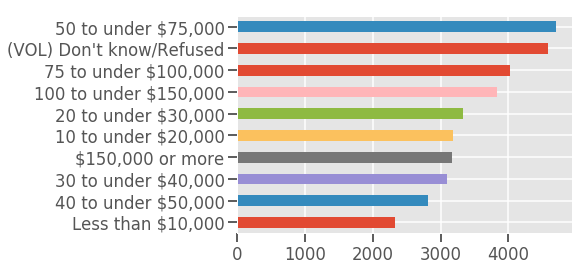

In [7]:
data.income.value_counts(ascending=True).plot.barh()
#Don't knows are a big group, account for them.

In [8]:
data2 = data.assign(
    Race=lambda x: x.racethn,
    Religion=lambda x: x.qe1,
    Income=lambda x: x.income,
)
data2['Religion']=data2.Religion.where(
        data2.Religion != "Mormon (Church of Jesus Christ of Latter-day Saints/LDS) ",
        "Mormon"
    ).where(
        data2.Religion == "Mormon (Church of Jesus Christ of Latter-day Saints/LDS) ",
        "Not Mormon",
    )

In [9]:
data2.Religion.value_counts()

Not Mormon    34407
Mormon          664
Name: Religion, dtype: int64

Sample size: 35071


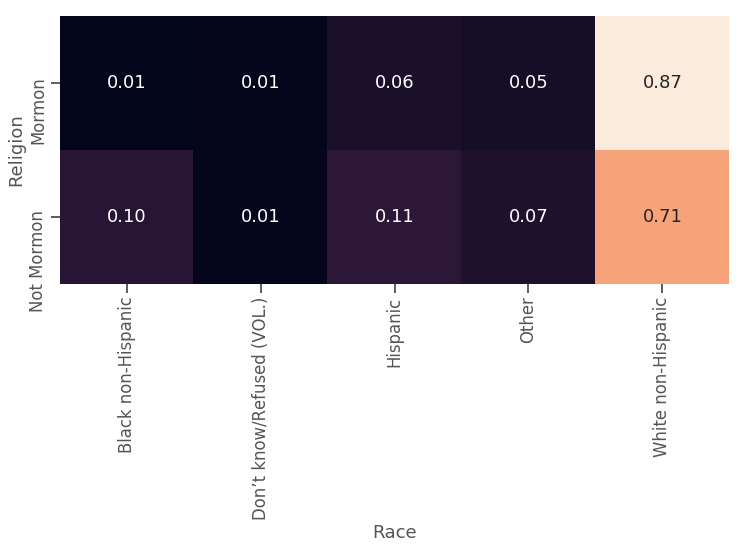

In [10]:
#Race by religion
sns.set_context('talk')
plt.figure(figsize=(12, 6))
t = data2[['Race','Religion','Income']].drop(columns=["Income"])
print(f"Sample size: {len(t)}")
(
    t.groupby("Religion")
    .Race.value_counts()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt=".2f")
)

Sample size: 35071


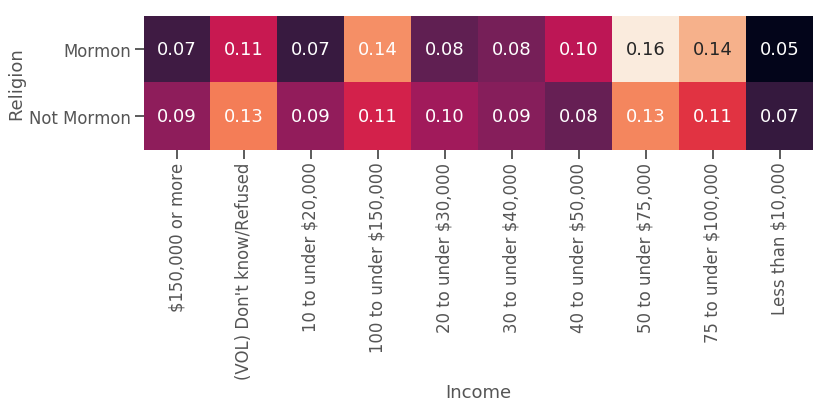

In [11]:
# Aggregate analysis
plt.figure(figsize=(12, 6))
t = data2[['Race','Religion','Income']].drop(columns=["Race"])
print(f"Sample size: {len(t)}")
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt=".2f")
)

Sample size: 24900


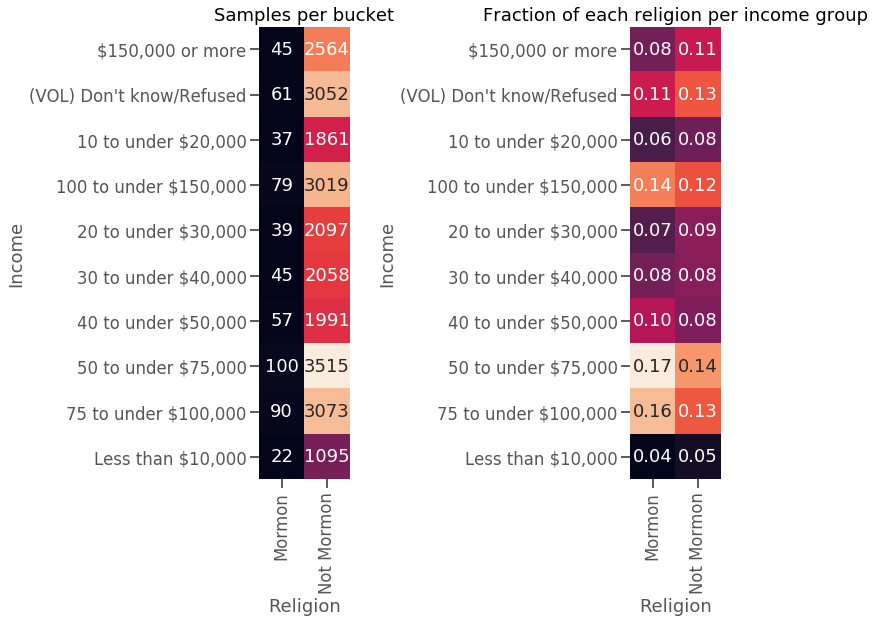

In [75]:
# Analysis by race, whites only
plt.figure(figsize=(12, 9))
t = data2[['Race','Religion','Income']].query('Race=="White non-Hispanic"').drop(columns=["Race"])
print(f"Sample size: {len(t)}")
ax=plt.subplot(1,2,1)
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack().T
    #.apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt="d")
)
plt.title('Samples per bucket')

plt.subplot(1,2,2,sharey=ax)
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1).T
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt=".2f")
)
plt.title('Fraction of each religion per income group')
plt.tight_layout()

In [76]:
# Recode race as NonWhite vs White
income = {
    "Less than $10,000": 1,
    "10 to under $20,000": 1,
    "20 to under $30,000": 1,
    "30 to under $40,000": 2,
    "40 to under $50,000": 2,
    "50 to under $75,000": 2,
    "75 to under $100,000": 3,
    "100 to under $150,000": 3,
    "$150,000 or more": 3,
    "(VOL) Don't know/Refused": 99,
}
data3 = data2.assign(Income=data2.Income.map(income))
data3 = data3.query('Race=="White non-Hispanic"').drop(columns=["Race"])

Sample size: 24900


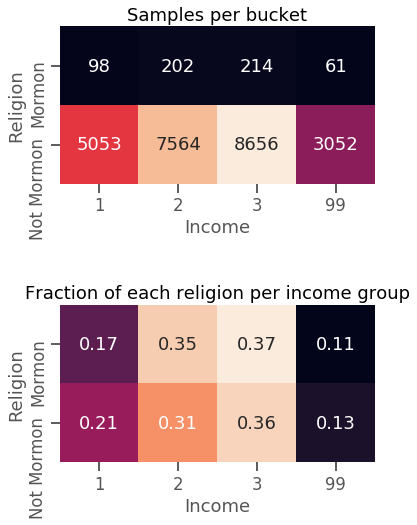

In [77]:
# Analysis by race (whites)

plt.figure(figsize=(6, 8))
t = data3[['Income','Religion']]
print(f"Sample size: {len(t)}")
ax=plt.subplot(2,1,1)
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack()
    #.apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt="d")
)
plt.title('Samples per bucket')
plt.subplot(2,1,2,sharex=ax)
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt=".2f")
)
plt.title('Fraction of each religion per income group')
plt.tight_layout()

In [19]:
from states import states
from gdppc import gdppc
data4=data3

In [20]:
data4.state.value_counts()

California              2098
Texas                   1379
New York                1319
Florida                 1311
Pennsylvania            1124
Illinois                 975
Ohio                     913
Michigan                 755
North Carolina           712
Virginia                 632
New Jersey               605
Georgia                  576
Massachusetts            559
Washington               542
Indiana                  532
Tennessee                526
Missouri                 516
Wisconsin                512
Minnesota                483
Arizona                  463
Colorado                 383
Maryland                 379
Kentucky                 362
Alabama                  346
South Carolina           341
Oregon                   338
North Dakota             307
Iowa                     304
Vermont                  293
Louisiana                289
Connecticut              286
Maine                    281
Idaho                    280
Montana                  278
Wyoming       

In [21]:
data4['StateGDP']=data4.state.str.rstrip().map(gdppc)
data4[['state','StateGDP']].pipe(lambda x: x[x.StateGDP.isna()]).state.unique()

array([], dtype=object)

In [22]:
data2[['Religion','state']].query('Religion=="Mormon"').state.value_counts()

Utah                    187
Idaho                    70
California               59
Arizona                  36
Washington               29
Wyoming                  28
Texas                    25
Florida                  14
Colorado                 14
Virginia                 13
Montana                  11
Nevada                   11
Alaska                   11
Oregon                   11
New York                  9
North Carolina            9
Georgia                   8
Ohio                      8
Missouri                  8
Tennessee                 7
Hawaii                    7
Illinois                  6
New Mexico                6
Indiana                   6
Oklahoma                  5
District of Columbia      4
West Virginia             4
Connecticut               4
Minnesota                 4
South Carolina            4
Mississippi               4
New Jersey                4
Pennsylvania              4
Alabama                   4
Massachusetts             4
Rhode Island        

Sample size: 274


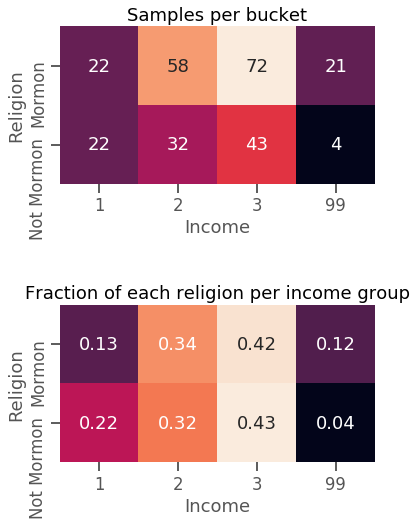

In [23]:
plt.figure(figsize=(6, 8))
t = data4[['Income','Religion','state']].query('state=="Utah "')
print(f"Sample size: {len(t)}")
ax=plt.subplot(2,1,1)
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack().fillna(0).astype(int)
    #.apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt="d")
)
plt.title('Samples per bucket')
plt.subplot(2,1,2,sharex=ax)
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt=".2f")
)
plt.title('Fraction of each religion per income group')
plt.tight_layout()

Sample size: 2098


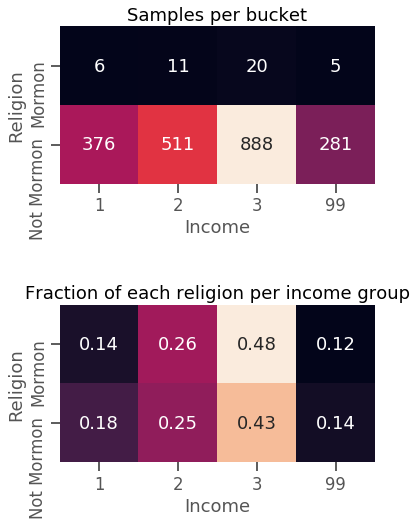

In [24]:
plt.figure(figsize=(6, 8))
t = data4[['Income','Religion','state']].query('state=="California "')
print(f"Sample size: {len(t)}")
ax=plt.subplot(2,1,1)
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack().fillna(0).astype(int)
    #.apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt="d")
)
plt.title('Samples per bucket')
plt.subplot(2,1,2,sharex=ax)
(
    t.groupby("Religion")
    .Income.value_counts()
    .unstack()
    .apply(lambda x: x / x.sum(), axis=1)
    .pipe(sns.heatmap, annot=True, cbar=False, square=True, fmt=".2f")
)
plt.title('Fraction of each religion per income group')
plt.tight_layout()

In [25]:
state='Utah '
dic={}
nsamples={}
for state in data4.state.unique():
    try:
        cond = (
    data4.query("state==@state")
    .groupby("Religion")
    .Income.value_counts()
    .unstack()
    .fillna(0)
    .astype(int)
    .loc["Mormon"]
    .pipe(lambda x: x.sum())
)
        if cond>20:
            nsamples[state]=cond
            dic[state]=(
                data4.query('state==@state').groupby("Religion")
                .Income.value_counts()
                .unstack().fillna(0).astype(int)
                .apply(lambda x: x / x.sum(), axis=1).iloc[:,0]
                .pipe(lambda x: x['Mormon']/x['Not Mormon'])

            )
    except:
        pass

Text(0.5, 1.0, 'Mormon poor % / Nonmormon poor %')

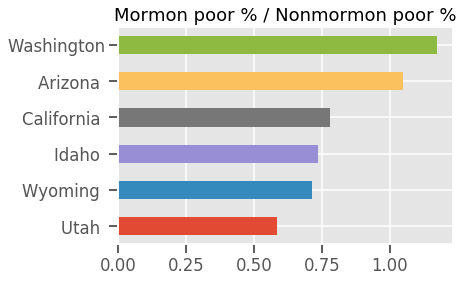

In [78]:
pd.DataFrame({'pov':dic,'N':nsamples}).sort_values('pov').pov.plot.barh()
plt.title('Mormon poor % / Nonmormon poor %')

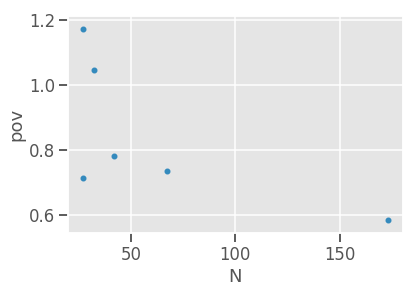

In [27]:
#Ratio 
pd.DataFrame({'pov':dic,'N':nsamples}).plot.scatter('N','pov')